In [1]:
import pandas as pd
import numpy as np
import lightgbm as lgb
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline

import Conversion

import warnings
warnings.filterwarnings('ignore')

wd = '/Users/ewenwang/Documents/practice_data/conversion_rate/'

file = 'data_all.txt'
Data = Conversion.Data(wd=wd, data_list=[file])

In [2]:
all_data = Data.all_data

In [35]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(all_data.head())

,category_1,category_2,context_id,context_page_id,day,hour,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_pv_level,item_sales_level,predict_category_0,predict_category_1,predict_category_2,property_0,property_1,property_2,shop_id,shop_review_num_level,shop_review_positive_rate,shop_score_delivery,shop_score_description,shop_score_service,shop_star_level,time,user_age_level,user_gender_id,user_id,user_occupation_id,user_query_day,user_query_day_hour,user_star_level,week
0,5799347067982556520,,282924576738839389,4006,18,10,108641074714126964,0.0,1975590437749032870,3948283326616421003,4,3412720377098676069,3,14,3,5799347067982556520,509660095530134768,5755694407684602296,2072967855524022579,5131280576272319091,2636395404473730413,6765930309048922341,4,1.0,1.0,1.0,1.0,5002,2018-09-18 10:09:04,1003,1,4505772604969228686,2005,3,3,3003,1
1,5799347067982556520,,4007979028023783431,4001,18,12,5754713551599725161,0.0,1975590437749032870,3948283326616421003,4,3412720377098676069,3,14,3,5799347067982556520,7908382889764677758,,2072967855524022579,5131280576272319091,2636395404473730413,6765930309048922341,4,1.0,1.0,1.0,1.0,5002,2018-09-18 12:00:32,1002,0,2692638157208937547,2005,8,5,3006,1
2,5799347067982556520,,4884875192608989870,4001,18,3,842679481291040981,0.0,1975590437749032870,3948283326616421003,4,3412720377098676069,3,14,3,5799347067982556520,7258015885215914736,7908382889764677758,2072967855524022579,5131280576272319091,2636395404473730413,6765930309048922341,4,1.0,1.0,1.0,1.0,5002,2018-09-18 03:04:12,1003,0,5247924392014515924,2005,2,2,3004,1
3,5799347067982556520,,840119421106178602,4016,18,6,937088850059189027,0.0,1975590437749032870,3948283326616421003,4,3412720377098676069,3,14,3,509660095530134768,5799347067982556520,7908382889764677758,2072967855524022579,5131280576272319091,2636395404473730413,6765930309048922341,4,1.0,1.0,1.0,1.0,5002,2018-09-18 06:17:50,1004,1,2681414445369714628,2005,1,1,3006,1
4,5799347067982556520,,1736769971710354684,4001,18,19,7975697065017708072,0.0,1975590437749032870,3948283326616421003,4,3412720377098676069,3,14,3,5799347067982556520,7908382889764677758,,2072967855524022579,5131280576272319091,2636395404473730413,6765930309048922341,4,1.0,1.0,1.0,1.0,5002,2018-09-18 19:48:40,1002,0,2729475788342039013,2005,2,2,3001,1


In [8]:
all_data.shape[0]

496509

In [20]:
user_item = all_data.groupby(['user_id', 'item_id'], as_index=False).size().sort_values(ascending=False).reset_index()
user_item.rename(columns={0:'user_item_count'}, inplace=True)

In [21]:
user_item.head(10)

,user_id,item_id,user_item_count
0,6140311644952863516,5997981559301046248,16
1,3659647698743758211,8548410271062308781,15
2,4221535911244811523,2580372091333893176,15
3,4221535911244811523,3552058326116455240,14
4,401199206152493460,7046628976913017377,12
5,6040154960559072464,6598527790798554641,12
6,8425649195030088489,2986722878397696833,12
7,9077306189515288541,9009278606688309879,11
8,7400233567079027658,5744241931999590246,11
9,1090882992362757187,2162168055043579911,10


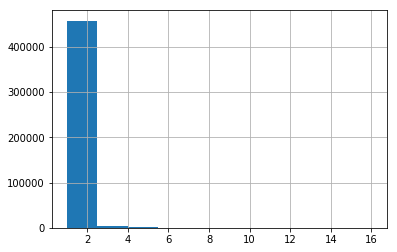

In [23]:
user_item.hist()

In [7]:
print(len(user_item))

479483


In [26]:
from copy import copy
data = copy(all_data)

In [27]:
data = data.merge(user_item, on=['user_id', 'item_id'], how='left')

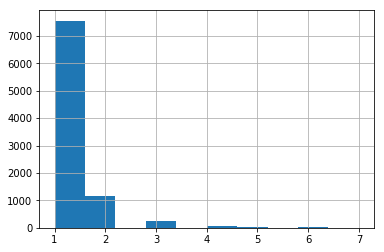

In [28]:
data[(data.is_trade==1)].user_item_count.hist()

In [36]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data[data.user_item_count==16])

,category_1,category_2,context_id,context_page_id,day,hour,instance_id,is_trade,item_brand_id,item_city_id,item_collected_level,item_id,item_price_level,item_pv_level,item_sales_level,predict_category_0,predict_category_1,predict_category_2,property_0,property_1,property_2,shop_id,shop_review_num_level,shop_review_positive_rate,shop_score_delivery,shop_score_description,shop_score_service,shop_star_level,time,user_age_level,user_gender_id,user_id,user_occupation_id,user_query_day,user_query_day_hour,user_star_level,week,user_item_count
59098,2642175453151805566,8868887661186419229,8298890042202830383,4001,18,8,7683619383911457888,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973024,0.980329,0.971999,5016,2018-09-18 08:31:03,1003,1,6140311644952863516,2002,3,2,3008,1,16
59265,2642175453151805566,8868887661186419229,6137270955784177473,4001,18,16,8767768748144533033,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973024,0.980329,0.971999,5016,2018-09-18 16:56:11,1003,1,6140311644952863516,2002,3,1,3008,1,16
134435,2642175453151805566,8868887661186419229,7230710916470536183,4001,21,10,3235506877963023837,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,13,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973216,0.980623,0.972232,5016,2018-09-21 10:07:27,1003,1,6140311644952863516,2002,1,1,3008,4,16
202246,2642175453151805566,8868887661186419229,4894259761912311742,4001,19,8,6718123102276547313,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973010,0.980381,0.971991,5016,2018-09-19 08:42:38,1003,1,6140311644952863516,2002,3,1,3008,2,16
202285,2642175453151805566,8868887661186419229,4065209006932322897,4001,19,17,7024120089725382113,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973010,0.980381,0.971991,5016,2018-09-19 17:02:55,1003,1,6140311644952863516,2002,3,1,3008,2,16
202379,2642175453151805566,8868887661186419229,1459199692450620,4001,19,9,2904360336848783093,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973010,0.980381,0.971991,5016,2018-09-19 09:08:21,1003,1,6140311644952863516,2002,3,1,3008,2,16
270322,2642175453151805566,8868887661186419229,2045449282666457670,4001,20,12,8876214365839459550,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973198,0.980569,0.972200,5016,2018-09-20 12:23:22,1003,1,6140311644952863516,2002,2,1,3008,3,16
270505,2642175453151805566,8868887661186419229,7998385664380252741,4001,20,19,5189058324366485559,0.0,8188723660812005813,5918626470536001929,12,5997981559301046248,4,16,12,8868887661186419229,7999314233231522439,1270200392831981176,2072967855524022579,2072967855524022579,5131280576272319091,2527079776459244580,19,1.0,0.973198,0.980569,0.972200,5016,2018-09-20 19:57:49,1003,1,6140311644952863516,2002,2,1,3008,3,16
340950,2642175453151805566,8868887661186419229,6636496270186947540,4001,22,22,1085558988628485602,0.0,8188723660812005813,

In [54]:
user_item_cv = data.groupby(['user_id', 'item_id'], as_index=False).is_trade.sum()
user_item_cv.rename(columns={'is_trade':'user_item_cv'}, inplace=True)

In [56]:
user_item_cv.sort_values(by='user_item_cv', ascending=False).head()

,user_id,item_id,user_item_cv
98970,1965358337508268958,2079092401639430105,3.0
324827,6482906738945512222,7183501913997303466,3.0
323771,6460912468204557708,8012757300722536153,2.0
328368,6555376699793002984,8021382380127415282,2.0
65209,1295171688357203961,4627333961840448559,2.0


In [ ]:
user_item = user_item.merge(user_item_cv, on=['user_id', 'item_id'], how='left')
user_item['user_item_cvr'] = user_item.user_item_cv/user_item.user_item_count
user_item.head()